# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp.solutions.holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp.solutions.holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(
        image, 
        results.face_landmarks, 
        mp.solutions.holistic.FACEMESH_CONTOURS, 
        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(
        image, 
        results.pose_landmarks, 
        mp.solutions.holistic.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(
        image, 
        results.left_hand_landmarks, 
        mp.solutions.holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
    ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(
        image, 
        results.right_hand_landmarks, 
        mp.solutions.holistic.HAND_CONNECTIONS, 
        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
    )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
         #Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefull
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 3. Extract Keypoint Values

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
pose

[array([ 0.54215217,  0.89209574, -1.48867428,  0.99706984]),
 array([ 0.5848012 ,  0.80431396, -1.38502991,  0.9970212 ]),
 array([ 0.60764253,  0.79986662, -1.3845073 ,  0.99678761]),
 array([ 0.62668824,  0.79562598, -1.38396573,  0.9966718 ]),
 array([ 0.49674171,  0.80770659, -1.4065454 ,  0.99714547]),
 array([ 0.46635723,  0.80608594, -1.40619397,  0.9967171 ]),
 array([ 0.44261423,  0.80544579, -1.40559125,  0.99663329]),
 array([ 0.65541148,  0.80357587, -0.8143419 ,  0.99700797]),
 array([ 0.41498643,  0.82201517, -0.89355528,  0.99635428]),
 array([ 0.59164512,  0.95876396, -1.25670278,  0.97442764]),
 array([ 0.4951922 ,  0.96519071, -1.28653717,  0.97583926]),
 array([ 0.75628918,  1.13659549, -0.5168016 ,  0.41801667]),
 array([ 0.30545121,  1.02596068, -0.59659344,  0.38016537]),
 array([ 0.86622113,  1.05433297, -0.44782266,  0.10680033]),
 array([ 0.28938669,  1.11473656, -0.81394994,  0.0656701 ]),
 array([ 0.74397171,  0.92169821, -0.20673108,  0.0577549 ]),
 array([

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
face

array([ 0.54412866,  0.98596495, -0.00808929, ...,  0.63073939,
        0.78434408, -0.00463978])

In [11]:
def calculate_features(points):
    # Calculate distances
    distances = np.linalg.norm(points[1:] - points[:-1], axis=-1)
    
    # Calculate angles
    vectors = points[1:] - points[:-1]
    cosines = np.sum(vectors[1:] * vectors[:-1], axis=-1)
    sines = np.linalg.norm(np.cross(vectors[1:], vectors[:-1]), axis=-1)
    angles = np.arctan2(sines, cosines)
    
    return np.concatenate([distances, angles])

# Replace your existing extract_keypoints function with this one
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    
    lh_keypoints = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]) if results.left_hand_landmarks else np.zeros((21, 3))
    rh_keypoints = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]) if results.right_hand_landmarks else np.zeros((21, 3))
    
    lh = lh_keypoints.flatten()
    rh = rh_keypoints.flatten()
    
    # Calculate additional features for left hand
    lh_features = calculate_features(lh_keypoints)
    lh = np.concatenate([lh, lh_features])
    
    # Calculate additional features for right hand
    rh_features = calculate_features(rh_keypoints)
    rh = np.concatenate([rh, rh_features])
    
    return np.concatenate([pose, face, lh, rh])


In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.54215217,  0.89209574, -1.48867428, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [14]:
# Path for exported data, numpy arrays
DATA_PATH ='D:\\Masters\\Machin Learning\\Sign Language\\Videos'
 

# Actions that we try to detect
actions = np.array(['hello', 'i love you',"will you","tell me","your name"])

# Thirty videos worth of data
no_sequences = 90

# Videos are going to be 30 frames in length
sequence_length = 30

In [15]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
import cv2

def adjust_brightness_contrast(frame, brightness=0, contrast=0):
    "Adjust brightness and contrast of a frame"
    return cv2.convertScaleAbs(frame, alpha=(1 + contrast/100), beta=brightness)

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(61, 90):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Apply brightness/contrast adjustment
                frame_adjusted = adjust_brightness_contrast(frame, brightness=50, contrast=50)

                # Make detections on the original frame
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Export keypoints from the original frame
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Make detections on the adjusted frame
                image_adjusted, results_adjusted = mediapipe_detection(frame_adjusted, holistic)

                # Draw landmarks on the adjusted frame
                draw_styled_landmarks(image_adjusted, results_adjusted)

                # Export keypoints from the adjusted frame
                keypoints_adjusted = extract_keypoints(results_adjusted)
                npy_path_adjusted = os.path.join(DATA_PATH, action, str(sequence), str(frame_num) + '_adjusted')
                np.save(npy_path_adjusted, keypoints_adjusted)

                # Mirror the frame
                frame_mirrored = cv2.flip(frame, 1)

                # Make detections on the mirrored frame
                image_mirrored, results_mirrored = mediapipe_detection(frame_mirrored, holistic)

                # Export keypoints from the mirrored frame
                keypoints_mirrored = extract_keypoints(results_mirrored)
                npy_path_mirrored = os.path.join(DATA_PATH, action, str(sequence), str(frame_num) + '_mirrored')
                np.save(npy_path_mirrored, keypoints_mirrored)

                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


# 6. Preprocess Data and Create Labels and Features

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
actions

array(['hello', 'i love you', 'will you', 'tell me', 'your name'],
      dtype='<U10')

In [18]:
label_map

{'hello': 0, 'i love you': 1, 'will you': 2, 'tell me': 3, 'your name': 4}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape

(450, 30, 1707)

In [21]:
np.array(labels).shape

(450,)

In [22]:
X = np.array(sequences)

In [23]:
X.shape

(450, 30, 1707)

In [24]:
y = to_categorical(labels).astype(int)

In [25]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)

# Split the temporary set into 50% validation and 50% test set
# This wil give 0% validation and 10% test sets of the original data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


In [27]:
def temporal_translation(video, shift=1):
    return np.roll(video, shift, axis=0)

# Create empty lists to store augmented videos and labels
X_augmented = []
y_augmented = []

# Loop over your original videos and labels
for video, label in zip(X_train, y_train):
    # Apply temporal translation to create a new video
    video_augmented = temporal_translation(video)
    
    # Append the augmented video and its label to the augmented dataset
    X_augmented.append(video_augmented)
    y_augmented.append(label)

# Convert the augmented dataset to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Concatenate the augmented data with the original data
X_train = np.concatenate((X_train, X_augmented))
y_train = np.concatenate((y_train, y_augmented))



In [28]:
def jitter_keypoints(video, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=video.shape)
    return video + noise

# Create empty lists to store augmented videos and labels
X_augmented = []
y_augmented = []

# Loop over your original videos and labels
for video, label in zip(X_train, y_train):
    # Apply jittering to create a new video
    video_augmented = jitter_keypoints(video)
    
    # Append the augmented video and its label to the augmented dataset
    X_augmented.append(video_augmented)
    y_augmented.append(label)

# Convert the augmented dataset to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Concatenate the augmented data with the original data
X_train = np.concatenate((X_train, X_augmented))
y_train = np.concatenate((y_train, y_augmented))


In [29]:
print(X_train.shape)


(1440, 30, 1707)


# 7. Build and Train LSTM Neural Network

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional,GRU,BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.callbacks import Callback
from IPython.display import clear_output


In [31]:

class PlotLosses(Callback):

    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.accs = []
        self.val_accs = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.accs.append(logs.get('categorical_accuracy'))
        self.val_accs.append(logs.get('val_categorical_accuracy'))
        self.i += 1

        clear_output(wait=True)
        plt.subplot(1, 2, 1)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(self.x, self.accs, label="accuracy")
        plt.plot(self.x, self.val_accs, label="val_accuracy")
        plt.legend()

        plt.show();

plot_losses = PlotLosses()

In [32]:
#LSTM Model_Relu
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1707)))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
#GRU Model_Relu
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1707)))
model.add(Dropout(0.1))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.1))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

In [46]:
#LSTM Model_Sigmoid
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='sigmoid', input_shape=(30,1707)))
model.add(Dropout(0.1))
model.add(LSTM(128, return_sequences=True, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

In [50]:
#Bidirectional LSTM Model_Sigmoid
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='sigmoid'), input_shape=(30,1707)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='sigmoid')))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(64, return_sequences=False, activation='sigmoid')))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

In [68]:
#GRU Model_GRU
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='sigmoid', input_shape=(30,1707)))
model.add(Dropout(0.1))
model.add(GRU(128, return_sequences=True, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(GRU(64, return_sequences=False, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
res = [.7, 0.2, 0.1]

In [43]:
actions[np.argmax(res)]

'hello'

In [144]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [145]:
early_stop = EarlyStopping(monitor='loss', patience=15)


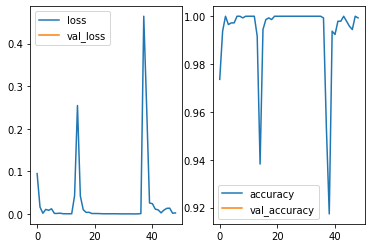

45/45 [==============================] - 3s 66ms/step - loss: 0.0024 - categorical_accuracy: 0.9993


In [146]:
model.fit(X_train, y_train, epochs=2000, callbacks=[early_stop,plot_losses],batch_size=32)

In [147]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 30, 64)            340416    
                                                                 
 dropout_55 (Dropout)        (None, 30, 64)            0         
                                                                 
 gru_7 (GRU)                 (None, 30, 128)           74496     
                                                                 
 dropout_56 (Dropout)        (None, 30, 128)           0         
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)              

# 8. Make Predictions

In [148]:
res = model.predict(X_test)
print("Predicted Action:", actions[np.argmax(res[1])])
print("True Action:", actions[np.argmax(y_test[1])])


2/2 [==============================] - 0s 17ms/step
Predicted Action: hello
True Action: hello


In [149]:
# For the validation data
res_val = model.predict(X_val)
print("Predicted Action:", actions[np.argmax(res_val[1])])
print("True Action:", actions[np.argmax(y_val[1])])


2/2 [==============================] - 0s 15ms/step
Predicted Action: i love you
True Action: i love you


# 9. Save Weights

In [104]:
model.save('LSTM_Relu.h5')

In [ ]:
del model

In [69]:
model.load_weights('GRU_SIGMOID.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [65]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
from sklearn.metrics import classification_report

# Evaluate using the test dataset
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

print("Multilabel Confusion Matrix:")
print(multilabel_confusion_matrix(ytrue, yhat))
print("\nAccuracy Score:", accuracy_score(ytrue, yhat))

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(ytrue, yhat, target_names=actions))


2/2 [==============================] - 0s 16ms/step
Multilabel Confusion Matrix:
[[[32  0]
  [ 0 13]]

 [[39  0]
  [ 0  6]]

 [[33  0]
  [ 0 12]]

 [[38  0]
  [ 0  7]]

 [[38  0]
  [ 0  7]]]

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

       hello       1.00      1.00      1.00        13
  i love you       1.00      1.00      1.00         6
    will you       1.00      1.00      1.00        12
     tell me       1.00      1.00      1.00         7
   your name       1.00      1.00      1.00         7

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [67]:
from sklearn.metrics import classification_report

# Evaluate using the validation dataset
yhat_val = model.predict(X_val)
ytrue_val = np.argmax(y_val, axis=1).tolist()
yhat_val = np.argmax(yhat_val, axis=1).tolist()

print("Multilabel Confusion Matrix for Validation Set:")
print(multilabel_confusion_matrix(ytrue_val, yhat_val))
print("\nAccuracy Score for Validation Set:", accuracy_score(ytrue_val, yhat_val))

# Print precision, recall, and F1-score for the validation set
print("\nClassification Report for Validation Set:")
print(classification_report(ytrue_val, yhat_val, target_names=actions))


2/2 [==============================] - 0s 15ms/step
Multilabel Confusion Matrix for Validation Set:
[[[40  0]
  [ 0  5]]

 [[36  0]
  [ 0  9]]

 [[31  0]
  [ 0 14]]

 [[37  0]
  [ 0  8]]

 [[36  0]
  [ 0  9]]]

Accuracy Score for Validation Set: 1.0

Classification Report for Validation Set:
              precision    recall  f1-score   support

       hello       1.00      1.00      1.00         5
  i love you       1.00      1.00      1.00         9
    will you       1.00      1.00      1.00        14
     tell me       1.00      1.00      1.00         8
   your name       1.00      1.00      1.00         9

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 11. Test in Real Time

In [71]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (16, 245, 117), (245, 16, 117)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [72]:
import threading
import pyttsx3

def text_to_speech(text):
    engine = pyttsx3.init()
    voices = engine.getProperty('voices')  # get all voices
    engine.setProperty('voice', voices[1].id)  # set the voice to the second one
    engine.say(text)
    engine.runAndWait()

def convert_to_speech_in_thread(recognized_word):
    threading.Thread(target=text_to_speech, args=(recognized_word,)).start()

# 1. New detection variables
sequence = []
sentence = []
threshold = 0.9
recognized_words = []
# Variable to store the last spoken word
last_spoken_word = None

# Add a counter for frames
frame_counter = 0
# Add a variable for delay in frames
frame_delay = 30  # Adjust this value according to your needs

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Increment the counter for each frame
        frame_counter += 1

        # Skip the current frame if frame_counter is less than frame_delay
        if frame_counter < frame_delay:
            continue

        # Reset the frame_counter and start the recognition process
        frame_counter = 0

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
            
            # Convert recognized word to speech in a separate thread
            recognized_word = actions[np.argmax(res)]
            if recognized_word != last_spoken_word:
                convert_to_speech_in_thread(recognized_word)
                last_spoken_word = recognized_word
                recognized_words.append(recognized_word)
            
            #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show the confidence of the action
        cv2.putText(image, 'Confidence: {:.2f}'.format(np.max(res)), (3,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
      
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
recognized_text = ','.join(recognized_words)

# Print the recognized text
print(recognized_text)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

Exception in thread Thread-6:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.S

1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

Exception in thread Thread-8:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-9:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-10:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solu

1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-12:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

Exception in thread Thread-15:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me


Exception in thread Thread-16:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==

1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<cla

Exception in thread Thread-18:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==================

Exception in thread Thread-21:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step


Exception in thread Thread-22:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-23:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step


Exception in thread Thread-25:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me


Exception in thread Thread-26:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-27:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-28:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-29:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me


Exception in thread Thread-30:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==

1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will

Exception in thread Thread-35:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [

Exception in thread Thread-37:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
i love you
<class 'mediapipe.python.solu

1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you


Exception in thread Thread-40:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step


Exception in thread Thread-42:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-43:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base

Exception in thread Thread-45:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==

Exception in thread Thread-47:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step


Exception in thread Thread-48:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.Sol

will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.Solution

Exception in thread Thread-54:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base

Exception in thread Thread-56:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
your name
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
your name
<class 'mediapipe.python.solution_base

Exception in thread Thread-58:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>

1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<cla

Exception in thread Thread-61:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-62:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.Solution

Exception in thread Thread-64:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>

1/1 [==============================] - 0s 26ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
will

Exception in thread Thread-66:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
tell me


Exception in thread Thread-67:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step


Exception in thread Thread-68:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step


Exception in thread Thread-69:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
tell me
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
will you
<class 'mediapipe.python.solution_base.SolutionOutput

Exception in thread Thread-72:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


i love you
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step


Exception in thread Thread-73:
Traceback (most recent call last):
  File "D:\Anacoda\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\Anacoda\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Kostas Politis\AppData\Local\Temp\ipykernel_3560\1446228760.py", line 9, in text_to_speech
  File "D:\Anacoda\lib\site-packages\pyttsx3\engine.py", line 177, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
hello
<class 'mediapipe.pyth

# 12. Audio to text

In [50]:
from transformers import AutoProcessor, AutoModel
from IPython.display import Audio

# Initialize the speech synthesis model
processor = AutoProcessor.from_pre trained("suno/bark-small")
model_audio = AutoModel.from_pretrained("suno/bark-small")

# Convert recognized words to a sentence
sentence_to_speak = recognized_text
#sentence_to_speak=["hello,i love you,will you,tell me,your name"]
# Convert sentence to speech
inputs = processor(text=[sentence_to_speak], return_tensors="pt")
speech_values = model_audio.generate(**inputs, do_sample=True)
sampling_rate = model_audio.generation_config.sample_rate
Audio(speech_values.cpu().numpy().squeeze(), rate=sampling_rate)




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [56]:
from transformers import AutoProcessor, AutoModel


processor = AutoProcessor.from_pretrained("suno/bark-small")
model = AutoModel.from_pretrained("suno/bark-small")

inputs = processor(
    text=["Hello.I love you, will you tell me your name?"],
    return_tensors="pt",
)

speech_values = model.generate(**inputs, do_sample=True)



from IPython.display import Audio

sampling_rate = model.generation_config.sample_rate
Audio(speech_values.cpu().numpy().squeeze(), rate=sampling_rate)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
